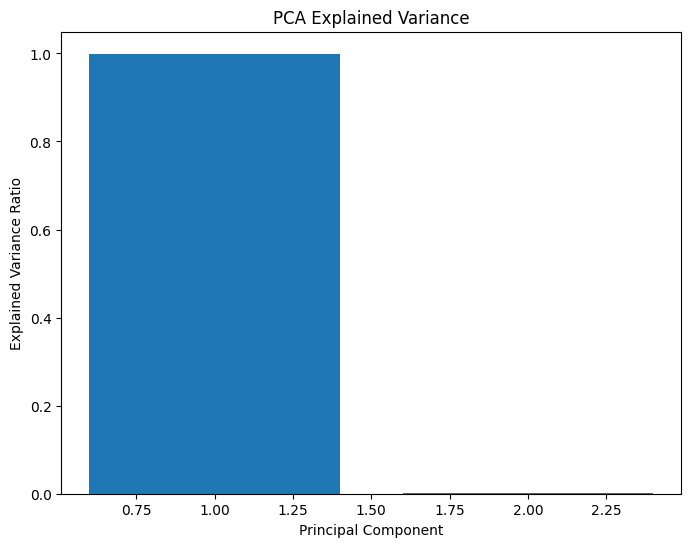

The most significant band between the two datasets is at wavelength 366.0 nm.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the two CSV files into pandas DataFrames
file1 = "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D2GT1.csv"
file2 = "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D3GT1.csv"

# Read the CSV files
data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)

# Assuming both files have 'Wavelength' and 'Reflectance' columns
# Ensure the data is sorted by Wavelength in both files to align them
data1 = data1.sort_values(by='Wavelength')
data2 = data2.sort_values(by='Wavelength')

# Merge the two datasets on 'Wavelength'
merged_data = pd.merge(data1[['Wavelength', 'Reflectance']], data2[['Wavelength', 'Reflectance']], on='Wavelength', suffixes=('_1', '_2'))

# Extract the reflectance values from both datasets
reflectance_data = merged_data[['Reflectance_1', 'Reflectance_2']].values

# Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(reflectance_data)

# Perform PCA
pca = PCA(n_components=2)  
pca.fit(scaled_data)

# Get the principal components
pc1 = pca.components_[0]
pc2 = pca.components_[1]

# Identify the most significant band (wavelength)
# The largest values in the first principal component (pc1) correspond to the most significant bands
most_significant_band = merged_data['Wavelength'][np.argmax(np.abs(pc1))]

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.show()

print(f"The most significant band between the two datasets is at wavelength {most_significant_band} nm.")


In [17]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the directory containing the CSV files
folder_path = "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\"

# Get all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize list to store results
most_significant_bands = []

# Iterate through the CSV files
for i in range(0, len(csv_files), 2):  # Assuming you have pairs of files (e.g., D2GB1.csv and D3GT1.csv)
    # Load the two CSV files
    file1 = os.path.join(folder_path, csv_files[i])
    file2 = os.path.join(folder_path, csv_files[i + 1])

    # Read the CSV files
    data1 = pd.read_csv(file1)
    data2 = pd.read_csv(file2)

    # Ensure the data is sorted by Wavelength in both files to align them
    data1 = data1.sort_values(by='Wavelength')
    data2 = data2.sort_values(by='Wavelength')

    # Merge the two datasets on 'Wavelength'
    merged_data = pd.merge(data1[['Wavelength', 'Reflectance']], data2[['Wavelength', 'Reflectance']], on='Wavelength', suffixes=('_1', '_2'))

    # Extract the reflectance values from both datasets
    reflectance_data = merged_data[['Reflectance_1', 'Reflectance_2']].values

    # Standardize the data (important for PCA)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(reflectance_data)

    # Perform PCA
    pca = PCA(n_components=2)
    pca.fit(scaled_data)

    # Get the first principal component
    pc1 = pca.components_[0]

    # Identify the most significant band (wavelength)
    most_significant_band = merged_data['Wavelength'][np.argmax(np.abs(pc1))]

    # Append the result for this pair of files
    most_significant_bands.append(most_significant_band)

# Print the most significant bands for each pair of files
for idx, band in enumerate(most_significant_bands):
    print(f"Most significant band for pair {csv_files[2*idx]} and {csv_files[2*idx+1]}: {band} nm.")


Most significant band for pair D1GB1.csv and D1GB2.csv: 356.0 nm.
Most significant band for pair D1GS1.csv and D1GS2.csv: 356.0 nm.
Most significant band for pair D1GS3.csv and D1GS4.csv: 356.0 nm.
Most significant band for pair D1GS5.csv and D1GT1.csv: 366.0 nm.
Most significant band for pair D1GT2.csv and D1RB1.csv: 356.0 nm.
Most significant band for pair D1RB2.csv and D1RS1.csv: 356.0 nm.
Most significant band for pair D1RS2.csv and D1RS3.csv: 356.0 nm.
Most significant band for pair D1RS4.csv and D1RS5.csv: 356.0 nm.
Most significant band for pair D1RS6.csv and D1RT1.csv: 366.0 nm.
Most significant band for pair D2GB1.csv and D2GS1.csv: 356.0 nm.
Most significant band for pair D2GS2.csv and D2GS3.csv: 356.0 nm.
Most significant band for pair D2GS4.csv and D2GT1.csv: 356.0 nm.
Most significant band for pair D2GT2.csv and D2RB1.csv: 366.0 nm.
Most significant band for pair D2RS1.csv and D2RS2.csv: 356.0 nm.
Most significant band for pair D2RS3.csv and D2RS4.csv: 356.0 nm.
Most signi

In [18]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the directory containing the CSV files
folder_path = "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\"

# Get all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize list to store results
most_significant_bands = []

# Iterate through the CSV files
for i in range(0, len(csv_files), 2):  # Assuming you have pairs of files (e.g., D2GB1.csv and D3GT1.csv)
    # Load the two CSV files
    file1 = os.path.join(folder_path, csv_files[i])
    file2 = os.path.join(folder_path, csv_files[i + 1])

    # Read the CSV files
    data1 = pd.read_csv(file1)
    data2 = pd.read_csv(file2)

    # Ensure the data is sorted by Wavelength in both files to align them
    data1 = data1.sort_values(by='Wavelength')
    data2 = data2.sort_values(by='Wavelength')

    # Merge the two datasets on 'Wavelength'
    merged_data = pd.merge(data1[['Wavelength', 'Reflectance']], data2[['Wavelength', 'Reflectance']], on='Wavelength', suffixes=('_1', '_2'))

    # Extract the reflectance values from both datasets
    reflectance_data = merged_data[['Reflectance_1', 'Reflectance_2']].values

    # Standardize the data (important for PCA)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(reflectance_data)

    # Perform PCA
    pca = PCA(n_components=2)
    pca.fit(scaled_data)

    # Get the first principal component
    pc1 = pca.components_[0]

    # Identify the most significant band (wavelength)
    most_significant_band = merged_data['Wavelength'][np.argmax(np.abs(pc1))]

    # Append the result for this pair of files
    most_significant_bands.append(most_significant_band)

# Print the most significant bands for each pair of files
for idx, band in enumerate(most_significant_bands):
    print(f"Most significant band for pair {csv_files[2*idx]} and {csv_files[2*idx+1]}: {band} nm.")


Most significant band for pair D1GB1.csv and D1GB2.csv: 356.0 nm.
Most significant band for pair D1GS1.csv and D1GS2.csv: 356.0 nm.
Most significant band for pair D1GS3.csv and D1GS4.csv: 356.0 nm.
Most significant band for pair D1GS5.csv and D1GT1.csv: 366.0 nm.
Most significant band for pair D1GT2.csv and D1RB1.csv: 356.0 nm.
Most significant band for pair D1RB2.csv and D1RS1.csv: 356.0 nm.
Most significant band for pair D1RS2.csv and D1RS3.csv: 356.0 nm.
Most significant band for pair D1RS4.csv and D1RS5.csv: 356.0 nm.
Most significant band for pair D1RS6.csv and D1RT1.csv: 366.0 nm.
Most significant band for pair D2GB1.csv and D2GS1.csv: 356.0 nm.
Most significant band for pair D2GS2.csv and D2GS3.csv: 356.0 nm.
Most significant band for pair D2GS4.csv and D2GT1.csv: 356.0 nm.
Most significant band for pair D2GT2.csv and D2RB1.csv: 366.0 nm.
Most significant band for pair D2RS1.csv and D2RS2.csv: 356.0 nm.
Most significant band for pair D2RS3.csv and D2RS4.csv: 356.0 nm.
Most signi

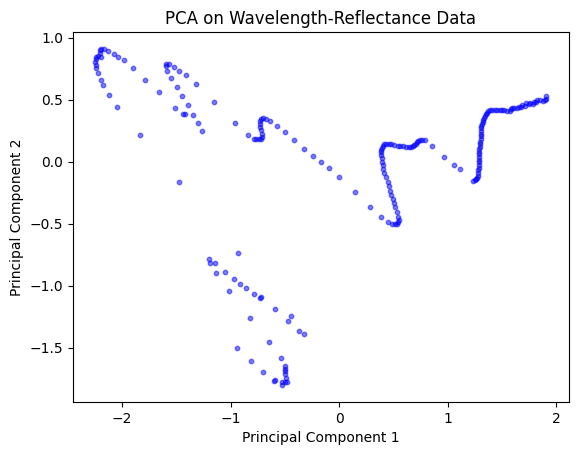

Explained Variance by Component: [0.76845877 0.23154123]


In [19]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv("C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D2GT1.csv")  # Replace with your file path

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Wavelength', 'Reflectance']])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Plot the principal components
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='b', s=10, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Wavelength-Reflectance Data')
plt.show()

# Explained variance by component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Component:", explained_variance)


   Wavelength  Reflectance
0       356.0        22.13
1       366.0        17.74
2       376.0        14.05
3       386.0        10.85
4       396.0        10.81


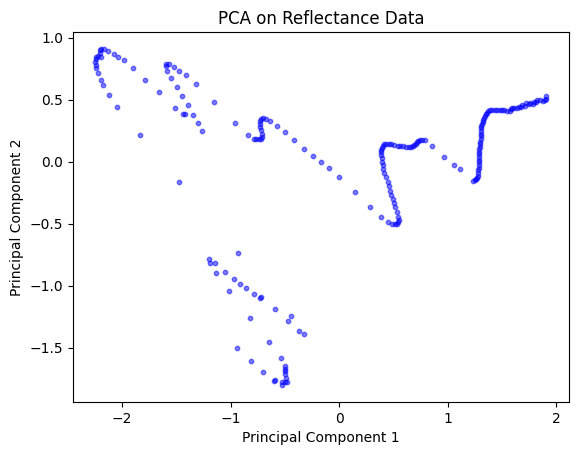

Explained Variance by Principal Components: [0.76845877 0.23154123]


In [20]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the reflectance data from CSV
data = pd.read_csv("C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D2GT1.csv")  

# Check the structure (assuming each column is a wavelength and each row is a sample)
print(data.head())

# Standardize the data (PCA requires standardized input for accurate results)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Adjust n_components based on how much reduction you want
pca_result = pca.fit_transform(data_scaled)

# Plot the result of the PCA
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='b', s=10, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Reflectance Data')
plt.show()

# Display explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Principal Components:", explained_variance)


In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset (replace 'data.csv' with your actual file)
data = pd.read_csv("C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D2GT1.csv")

# Assuming the first column is wavelength and the second is reflectance
wavelength = data.iloc[:, 0].values
reflectance = data.iloc[:, 1:].values  # Exclude wavelength column for PCA

# Standardize the reflectance values (important for PCA)
scaler = StandardScaler()
reflectance_scaled = scaler.fit_transform(reflectance)

# Apply PCA to reduce the rows to 20 components
pca = PCA(n_components=20)
reduced_data = pca.fit_transform(reflectance_scaled)

# Create a DataFrame with the reduced data
reduced_df = pd.DataFrame(reduced_data)

# Save the reduced data to a new CSV
reduced_df.to_csv('reduced_data.csv', index=False)

# Print the shape of the reduced data (should have 20 components as columns)
print(reduced_df.shape)


ValueError: n_components=20 must be between 0 and min(n_samples, n_features)=1 with svd_solver='covariance_eigh'

In [4]:
import pandas as pd

# Example input: assuming 'data.csv' has two columns: 'Headers' and 'Values'
data = pd.read_csv("C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D2GT1.csv")

# Show the first few rows to verify the data
print(data.head())

# Separate the columns
wavelength = data['Wavelength'].values.reshape(-1, 1)  # Convert to 2D array for PCA
reflectance = data['Reflectance'].values.reshape(-1, 1)

# Stack the features into a matrix (each row is a sample, each column is a feature)
features = pd.concat([pd.Series(wavelength.flatten()), pd.Series(reflectance.flatten())], axis=1)

# Print the transformed data (features)
print("Transformed Data:")
print(features.head())



   Wavelength  Reflectance
0       356.0        22.13
1       366.0        17.74
2       376.0        14.05
3       386.0        10.85
4       396.0        10.81
Transformed Data:
       0      1
0  356.0  22.13
1  366.0  17.74
2  376.0  14.05
3  386.0  10.85
4  396.0  10.81


In [5]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=1)  # You can change the number of components as needed
transformed_data = pca.fit_transform(features)

# Print the transformed data after PCA
print("Transformed Data after PCA:")
print(transformed_data)


Transformed Data after PCA:
[[-1074.48102906]
 [-1064.38362345]
 [-1054.30216323]
 [-1044.23186478]
 [-1034.2335484 ]
 [-1024.19149608]
 [-1014.20206355]
 [-1004.19668564]
 [ -994.19267447]
 [ -984.21121465]
 [ -974.22998261]
 [ -964.24396696]
 [ -954.25407886]
 [ -944.26669646]
 [ -934.31371055]
 [ -924.41744468]
 [ -914.57470978]
 [ -904.75133714]
 [ -894.8701055 ]
 [ -884.93147045]
 [ -874.94704933]
 [ -864.91410867]
 [ -854.84494918]
 [ -844.78922938]
 [ -834.75104951]
 [ -824.7165143 ]
 [ -814.66626149]
 [ -804.63286524]
 [ -794.63591561]
 [ -784.54374919]
 [ -774.45454407]
 [ -764.3769563 ]
 [ -754.35221612]
 [ -744.46825099]
 [ -734.89157636]
 [ -725.37048282]
 [ -715.68720185]
 [ -705.87681332]
 [ -695.95184575]
 [ -686.01002161]
 [ -676.04086252]
 [ -666.07625925]
 [ -656.10391108]
 [ -646.1213123 ]
 [ -636.13415769]
 [ -626.14518075]
 [ -616.1564316 ]
 [ -606.15355939]
 [ -596.14203111]
 [ -586.15738221]
 [ -576.17204993]
 [ -566.17327796]
 [ -556.16288864]
 [ -546.14703232]


In [20]:
import os
import pandas as pd

# Folder containing the CSV files
folder_path = "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files"

# List to store data for the new CSV file
data = []

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Extract wavelength and reflectance columns
        wavelengths = df['Wavelength'].tolist()
        reflectance = df['Reflectance'].tolist()
        
        # Create a row where the first column is the file name and subsequent columns are the reflectance values
        row = [file_name] + reflectance
        data.append(row)

# Convert the data into a DataFrame
# The first column will be 'File Name' and the remaining columns will be the reflectance values for each wavelength
wavelengths = df['Wavelength'].tolist()  # Get the wavelengths from the last file for column headers
headers = ['File Name'] + wavelengths

# Create the new DataFrame
new_df = pd.DataFrame(data, columns=headers)
print(new_df)
# Write the new DataFrame to a CSV file
new_df.to_csv("output_reflectance4.csv", index=False)




    File Name  356.0  366.0  376.0  386.0  396.0  406.0  416.0  426.0  436.0  \
0   D1GB1.csv  28.85  25.03  20.18  16.29  16.25  13.77  13.90  13.66  13.03   
1   D1GB2.csv  29.34  24.67  19.33  15.57  15.60  13.14  13.39  12.97  12.34   
2   D1GS1.csv  34.83  29.01  22.76  17.90  17.87  14.91  15.42  15.65  15.24   
3   D1GS2.csv  36.25  30.23  23.91  19.12  18.83  15.72  16.15  16.27  15.67   
4   D1GS3.csv  32.55  27.56  21.11  16.76  17.63  14.43  14.56  14.12  13.32   
..        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
81  D6RS3.csv   8.96   7.00   5.62   4.13   4.01   3.02   2.85   2.59   2.33   
82  D6RS4.csv  15.90  13.74  11.90  10.11   9.78   8.56   8.22   7.81   7.52   
83  D6RS5.csv  14.46  12.38   9.81   8.27   7.79   6.39   6.13   5.68   5.29   
84  D6RT1.csv  10.47   9.11   7.27   6.02   5.87   4.72   4.53   4.27   4.11   
85  D6RT2.csv  11.22   9.60   7.71   6.72   6.55   5.35   5.34   4.99   4.83   

    ...  2416.0  2426.0  2436.0  2446.0

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the CSV file
file_path = "output_reflectance.csv"
df = pd.read_csv(file_path)

# Step 2: Prepare the data (exclude non-numeric columns if necessary)
# If your CSV contains non-numeric columns, you might need to exclude them for PCA
numeric_data = df.select_dtypes(include=['float64', 'int64'])  # Select numeric columns only

# Step 3: Standardize the data (optional, but recommended for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 4: Apply PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
pca_result = pca.fit_transform(scaled_data)

# Step 5: Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])  # Rename columns for the PCs
# You can add more PCs if needed by adjusting the 'n_components' in PCA

# Step 6: Explained variance (optional)
explained_variance = pca.explained_variance_ratio_

# Print the results
print("Explained Variance Ratio (for each principal component):")
print(explained_variance)
print(pca_df)
# Save the PCA results to a new CSV file
# pca_df.to_csv("pca_results.csv", index=False)

# Optionally, you can add the original dataframe's index or any other metadata to the pca_df if needed


Explained Variance Ratio (for each principal component):
[0.95719482 0.03173036]
         PC1       PC2
0  -3.450093  0.281261
1  -3.450184  0.281357
2  -3.447446  0.284100
3  -3.446972  0.284479
4  -3.447691  0.283895
..       ...       ...
87 -3.455133  0.276505
88 -3.452800  0.279451
89 -3.453310  0.278756
90 -3.454389  0.277057
91 -3.453746  0.278121

[92 rows x 2 columns]


Top 10 most important wavelengths:
1. 786.0 nm
2. 776.0 nm
3. 796.0 nm
4. 866.0 nm
5. 876.0 nm
6. 1066.0 nm
7. 1076.0 nm
8. 856.0 nm
9. 886.0 nm
10. 1056.0 nm


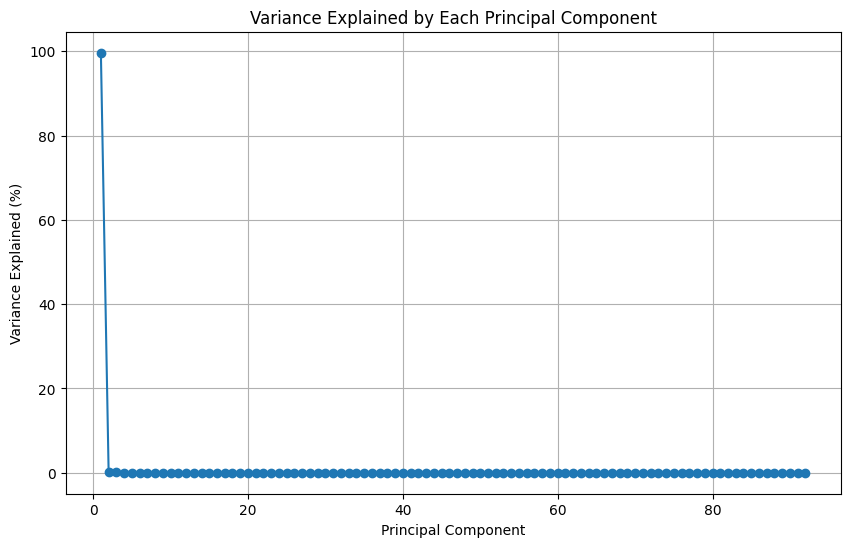

In [18]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data
file_path = "output_reflectance.csv"
data = pd.read_csv(file_path)

# Remove the "File Name" column
reflectance_data = data.drop(columns=["File Name"])

# Perform PCA
pca = PCA()
pca.fit(reflectance_data)

# Identify the most significant wavelengths by examining the loadings of the first principal component
wavelengths = reflectance_data.columns.astype(float)
loadings = pca.components_[0]
sorted_indices = np.argsort(np.abs(loadings))[::-1]
most_important_wavelengths = wavelengths[sorted_indices]

# Print the top 10 most important wavelengths
print("Top 10 most important wavelengths:")
for i, wavelength in enumerate(most_important_wavelengths[:10], 1):
    print(f"{i}. {wavelength} nm")

# Plot the explained variance ratio for each component
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_ * 100, marker='o', linestyle='-')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.title("Variance Explained by Each Principal Component")
plt.grid(True)
plt.show()


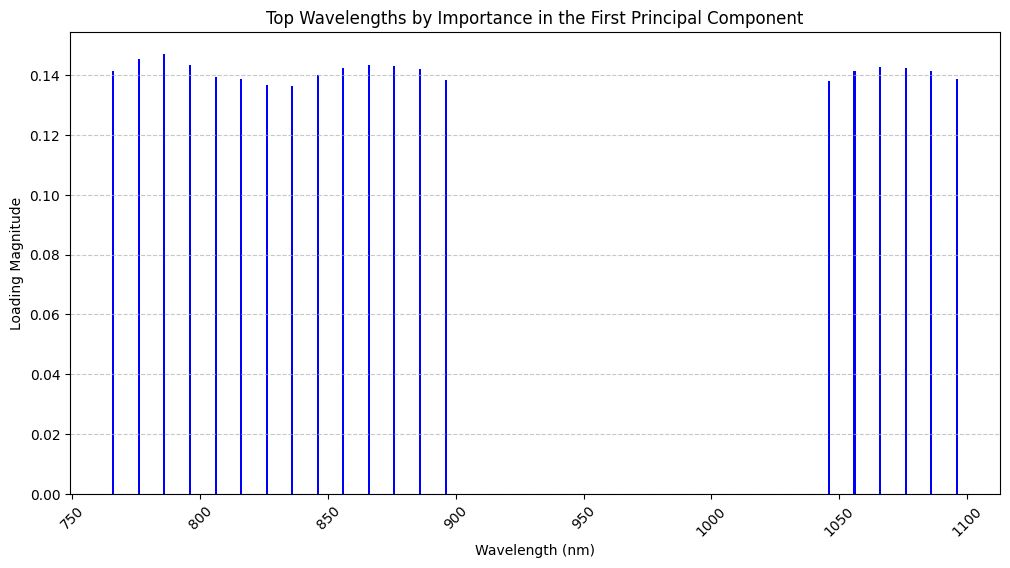

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd

# Load the data
file_path = "output_reflectance.csv"
data = pd.read_csv(file_path)

# Remove the "File Name" column
reflectance_data = data.drop(columns=["File Name"])

# Perform PCA
pca = PCA()
pca.fit(reflectance_data)

# Sort wavelengths by the absolute values of their loadings for the first principal component
wavelengths = reflectance_data.columns.astype(float)
loadings = pca.components_[0]
sorted_indices = np.argsort(np.abs(loadings))[::-1]
top_n = 20  # Number of top wavelengths to display
top_wavelengths = wavelengths[sorted_indices[:top_n]]
top_loadings = np.abs(loadings[sorted_indices[:top_n]])

# Plot the importance of the top wavelengths
plt.figure(figsize=(12, 6))
plt.bar(top_wavelengths, top_loadings, color='b')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Loading Magnitude")
plt.title("Top Wavelengths by Importance in the First Principal Component")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Top 10 most important wavelengths:
1. 746.0 nm
2. 736.0 nm
3. 766.0 nm
4. 756.0 nm
5. 776.0 nm
6. 786.0 nm
7. 726.0 nm
8. 796.0 nm
9. 806.0 nm
10. 816.0 nm


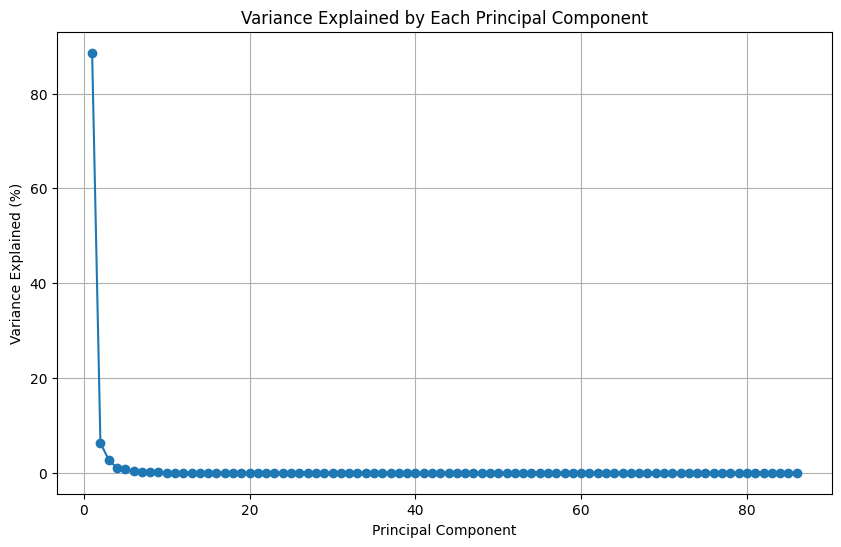

In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data
file_path = "output_reflectance4.csv"
data = pd.read_csv(file_path)

# Remove the "File Name" column
reflectance_data = data.drop(columns=["File Name"])

# Perform PCA
pca = PCA()
pca.fit(reflectance_data)

# Identify the most significant wavelengths by examining the loadings of the first principal component
wavelengths = reflectance_data.columns.astype(float)
loadings = pca.components_[0]
sorted_indices = np.argsort(np.abs(loadings))[::-1]
most_important_wavelengths = wavelengths[sorted_indices]

# Print the top 10 most important wavelengths
print("Top 10 most important wavelengths:")
for i, wavelength in enumerate(most_important_wavelengths[:10], 1):
    print(f"{i}. {wavelength} nm")

# Plot the explained variance ratio for each component
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_ * 100, marker='o', linestyle='-')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.title("Variance Explained by Each Principal Component")
plt.grid(True)
plt.show()


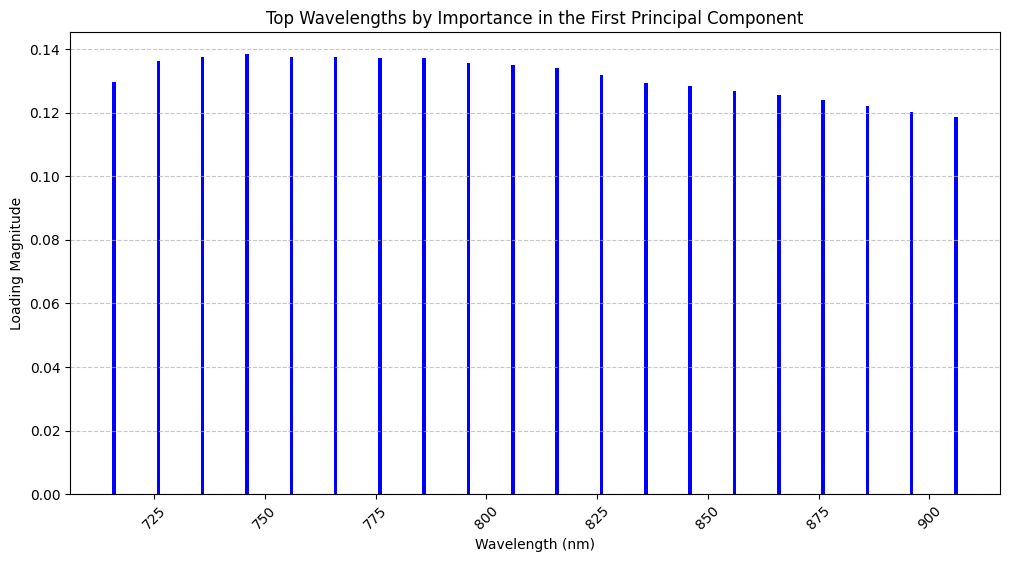

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd

# Load the data
file_path = "output_reflectance4.csv"
data = pd.read_csv(file_path)

# Remove the "File Name" column
reflectance_data = data.drop(columns=["File Name"])

# Perform PCA
pca = PCA()
pca.fit(reflectance_data)

# Sort wavelengths by the absolute values of their loadings for the first principal component
wavelengths = reflectance_data.columns.astype(float)
loadings = pca.components_[0]
sorted_indices = np.argsort(np.abs(loadings))[::-1]
top_n = 20  # Number of top wavelengths to display
top_wavelengths = wavelengths[sorted_indices[:top_n]]
top_loadings = np.abs(loadings[sorted_indices[:top_n]])

# Plot the importance of the top wavelengths
plt.figure(figsize=(12, 6))
plt.bar(top_wavelengths, top_loadings, color='b')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Loading Magnitude")
plt.title("Top Wavelengths by Importance in the First Principal Component")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
